In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer
import re
import warnings
warnings.filterwarnings("ignore")
#nltk.download('stopwords')

In [ ]:
train = pd.read_csv("C:/Users/Asus/Documents/Soumaya/train/train.csv")
train.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


In [ ]:
train.shape

(27481, 4)

In [ ]:
train["sentiment"].unique()

array(['neutral', 'negative', 'positive'], dtype=object)

In [ ]:
train["sentiment"].value_counts()

neutral     11118
positive     8582
negative     7781
Name: sentiment, dtype: int64

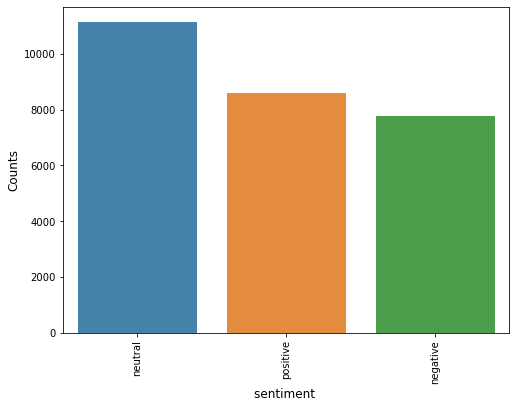

In [ ]:
label_counts = train.sentiment.value_counts()
plt.figure(figsize = (8,6))
sns.barplot(label_counts.index, label_counts.values, alpha = 0.9)
plt.xticks(rotation = 'vertical')
plt.xlabel('sentiment ', fontsize =12)
plt.ylabel('Counts', fontsize = 12)
plt.show()

In [ ]:
train['sentiment'] = train['sentiment'].map({'neutral': 0, 'positive': 1,"negative":2})
train.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",0
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,2
2,088c60f138,my boss is bullying me...,bullying me,2
3,9642c003ef,what interview! leave me alone,leave me alone,2
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",2


In [ ]:
train[train.isnull().any(axis=1)]

,textID,text,selected_text,sentiment
314,fdb77c3752,NaN,NaN,0


In [ ]:
train.drop(train.index[314], inplace=True)

In [ ]:
train[train.isnull().any(axis=1)]


,textID,text,selected_text,sentiment


In [ ]:
stop_words = set(stopwords.words('english'))

In [ ]:
def data_text_preprocess(total_text, ind, col):
    # Enlever les valeurs int des données de text
    if type(total_text) is not int:
        string = ""
        # remplacer tous les caractères spéciaux par des espaces
        total_text = re.sub('[^a-zA-Z0-9\n]', ' ', str(total_text))
        # remplacer les espaces multiples par un espace unique
        total_text = re.sub('\s+',' ', str(total_text))
        # ramener l'ensemble du texte à la même échelle de minuscules.
        total_text = total_text.lower()
        
        
        for word in total_text.split():
        # si le mot n'est pas un mot d'arrêt, alors retenez ce mot dans le texte
            if not word in stop_words:
                string += word + " "
        
        train[col][ind] = string

In [ ]:
for index, row in train.iterrows():
    if type(row['selected_text']) is str:
        data_text_preprocess(row['selected_text'], index, 'selected_text')

In [ ]:
train.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going",responded going,0
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,sooo sad,2
2,088c60f138,my boss is bullying me...,bullying,2
3,9642c003ef,what interview! leave me alone,leave alone,2
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...",sons,2


In [ ]:
X = train["selected_text"]
y = train["sentiment"]

## MODEL

In [ ]:
from sklearn.model_selection import train_test_split

X_train, test_df, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2)

In [ ]:
X_train.shape , y_train.shape

((21984,), (21984,))

In [ ]:
test_df.shape , y_test.shape

((5496,), (5496,))

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()
vect.fit_transform(X_train)

<21984x15009 sparse matrix of type '<class 'numpy.int64'>'
	with 85820 stored elements in Compressed Sparse Row format>

In [ ]:
simple_train_dtm = vect.transform(X_train)
# examiner ensemble le vocabulaire et la matrice des termes du document
X_train = pd.DataFrame(simple_train_dtm.toarray(), columns=vect.get_feature_names())
X_train.head()

,00,000,007,01,02,03,04,0407,05,06,...,zsg,zu,zuccini,zul,zulu,zum,zune,zwarte,zwitschert,zzzz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X_train.shape

(21984, 15009)

In [ ]:
test = vect.transform(test_df)
X_test = pd.DataFrame(test.toarray(), columns=vect.get_feature_names())
X_test.head()

,00,000,007,01,02,03,04,0407,05,06,...,zsg,zu,zuccini,zul,zulu,zum,zune,zwarte,zwitschert,zzzz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X_test.shape

(5496, 15009)

In [ ]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression(multi_class='auto')
%time log.fit(X_train, y_train )

Wall time: 1min 34s


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = log.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[1749  213  261]
 [ 145 1439  133]
 [ 213   86 1257]]
              precision    recall  f1-score   support

           0       0.83      0.79      0.81      2223
           1       0.83      0.84      0.83      1717
           2       0.76      0.81      0.78      1556

    accuracy                           0.81      5496
   macro avg       0.81      0.81      0.81      5496
weighted avg       0.81      0.81      0.81      5496

0.8087700145560408


In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB(var_smoothing=1e-6)
%time gnb.fit(X_train, y_train )

Wall time: 9.95 s


GaussianNB(priors=None, var_smoothing=1e-06)

In [ ]:
y_pred = gnb.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[1113  757  353]
 [ 144 1527   46]
 [ 173  785  598]]
              precision    recall  f1-score   support

           0       0.78      0.50      0.61      2223
           1       0.50      0.89      0.64      1717
           2       0.60      0.38      0.47      1556

    accuracy                           0.59      5496
   macro avg       0.63      0.59      0.57      5496
weighted avg       0.64      0.59      0.58      5496

0.589155749636099


In [ ]:
from sklearn.naive_bayes import MultinomialNB
mb= MultinomialNB()
%time mb.fit(X_train, y_train )

Wall time: 26.2 s


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
y_pred = mb.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[1971  141  111]
 [ 342 1348   27]
 [ 512   72  972]]
              precision    recall  f1-score   support

           0       0.70      0.89      0.78      2223
           1       0.86      0.79      0.82      1717
           2       0.88      0.62      0.73      1556

    accuracy                           0.78      5496
   macro avg       0.81      0.77      0.78      5496
weighted avg       0.80      0.78      0.78      5496

0.7807496360989811


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier 
gbm0 = GradientBoostingClassifier(random_state=100)
%time gbm0.fit(X_train, y_train )

Wall time: 3h 7min 40s


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=100, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
y_pred = gbm0.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

In [ ]:
import lightgbm as lgb
model = lgb.LGBMClassifier( min_child_samples=40)
%time model.fit(X_train, y_train )

Wall time: 22.4 s


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=40, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[1667  151  405]
 [ 185 1137  395]
 [ 271   55 1230]]
              precision    recall  f1-score   support

           0       0.79      0.75      0.77      2223
           1       0.85      0.66      0.74      1717
           2       0.61      0.79      0.69      1556

    accuracy                           0.73      5496
   macro avg       0.75      0.73      0.73      5496
weighted avg       0.75      0.73      0.74      5496

0.7339883551673945


In [ ]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators=500,oob_score=True,min_samples_split=5 )
%time model_rf.fit(X_train, y_train )

Wall time: 47min 48s


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_pred = model_rf.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[1665  279  279]
 [ 125 1437  155]
 [ 231   89 1236]]
              precision    recall  f1-score   support

           0       0.82      0.75      0.78      2223
           1       0.80      0.84      0.82      1717
           2       0.74      0.79      0.77      1556

    accuracy                           0.79      5496
   macro avg       0.79      0.79      0.79      5496
weighted avg       0.79      0.79      0.79      5496

0.7893013100436681


In [ ]:
import xgboost as xgb
xgb = xgb.XGBClassifier(random_state=200)
%time xgb.fit(X_train, y_train )

Wall time: 24min 49s


XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=200, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method=None, validate_parameters=False, verbosity=None)

In [ ]:
y_pred = xgb.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[1688  166  369]
 [ 183 1238  296]
 [ 260   52 1244]]
              precision    recall  f1-score   support

           0       0.79      0.76      0.78      2223
           1       0.85      0.72      0.78      1717
           2       0.65      0.80      0.72      1556

    accuracy                           0.76      5496
   macro avg       0.76      0.76      0.76      5496
weighted avg       0.77      0.76      0.76      5496

0.7587336244541485


In [ ]:
test = pd.read_csv("C:/Users/Asus/Documents/Soumaya/test/test.csv"")
test.head()

,textID,text,sentiment
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,neutral
1,96d74cb729,Shanghai is also really exciting (precisely -...,positive
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",negative
3,01082688c6,happy bday!,positive
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,positive


In [ ]:
test.shape

(3534, 3)

In [ ]:
def data_text_preprocess(total_text, ind, col):
    # Supprimer les valeurs int des données textuelles car cela pourrait ne pas être imp
    if type(total_text) is not int:
        string = ""
        # remplacer tous les caractères spéciaux par des espaces
        total_text = re.sub('[^a-zA-Z0-9\n]', ' ', str(total_text))
        # remplacer les espaces multiples par un espace unique
        total_text = re.sub('\s+',' ', str(total_text))
        # mettre l'ensemble du texte à la même échelle de minuscules.
        total_text = total_text.lower()
        
        
        for word in total_text.split():
        # si le mot n'est pas un mot d'arrêt, il faut le conserver dans le texte
            if not word in stop_words:
                string += word + " "
        
        test[col][ind] = string

In [ ]:
for index, row in test.iterrows():
    if type(row['sentiment']) is str:
        data_text_preprocess(row['sentiment'], index, 'sentiment')

In [ ]:
XX= test["sentiment"]

In [ ]:
simple_train_dtm = vect.transform(XX)
# examiner ensemble le vocabulaire et la matrice des termes du document
Xtest = pd.DataFrame(simple_train_dtm.toarray(), columns=vect.get_feature_names())
Xtest.head()

,00,000,007,01,02,03,04,0407,05,06,...,zsg,zu,zuccini,zul,zulu,zum,zune,zwarte,zwitschert,zzzz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
Xtest.shape

(3534, 15009)

In [ ]:
y_pred = mb.predict(Xtest)
y_pred.shape

(3534,)

In [ ]:
test.head()

,textID,text,sentiment
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,neutral
1,96d74cb729,Shanghai is also really exciting (precisely -...,positive
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",negative
3,01082688c6,happy bday!,positive
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,positive


In [ ]:
sub1 = pd.DataFrame({'id': test.textID, 'sentiment':y_pred})
sub1.to_csv('C:/Users/Asus/Documents/Soumaya/solution/solution.csv', index=False)
sub1.head()

,id,sentiment
0,f87dea47db,0
1,96d74cb729,1
2,eee518ae67,2
3,01082688c6,1
4,33987a8ee5,1


In [ ]:
sub1['sentiment'] = sub1['sentiment'].map({0 : "neutral", 1: "positive",2:"negative"})
sub1.head()

,id,sentiment
0,f87dea47db,neutral
1,96d74cb729,positive
2,eee518ae67,negative
3,01082688c6,positive
4,33987a8ee5,positive


In [ ]:
sub1.to_csv("C:/Users/Asus/Documents/Soumaya/sample/samplesubmission.csv", index=False)
sub1.head()

,id,sentiment
0,f87dea47db,neutral
1,96d74cb729,positive
2,eee518ae67,negative
3,01082688c6,positive
4,33987a8ee5,positive
